<h1 align="center"><b>Customer Churn Analysis<b></h1>

**Author: Faryal Rifaz** 

**Date: November 2025**

**Connect:[https://www.linkedin.com/in/faryal-rifaz/]**

## 1. Load Dataset 

In [33]:
import pandas as pd
data = pd.read_csv("customer_churn.csv")
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617,20,1


## 2. Check Info, Missing values and Descriptive Statistics 

In [34]:
data.info()
data.isnull().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         2492 non-null   int64 
 1   Age                2492 non-null   int64 
 2   Gender             2492 non-null   object
 3   Tenure             2492 non-null   int64 
 4   Usage Frequency    2492 non-null   int64 
 5   Support Calls      2492 non-null   int64 
 6   Payment Delay      2492 non-null   int64 
 7   Subscription Type  2492 non-null   object
 8   Contract Length    2492 non-null   object
 9   Total Spend        2492 non-null   int64 
 10  Last Interaction   2492 non-null   int64 
 11  Churn              2492 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 233.8+ KB


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000
mean,1254.359149,41.218299,31.206661,15.493178,4.913724,15.039326,552.364366,15.449839,0.961878
std,719.760680,14.116924,17.423142,8.657516,3.160910,8.970001,255.243770,8.666457,0.191529
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,101.000000,1.000000,0.000000
25%,631.750000,29.000000,16.000000,8.000000,2.000000,7.000000,342.000000,8.000000,1.000000
50%,1254.500000,41.000000,32.000000,15.000000,5.000000,15.000000,555.000000,16.000000,1.000000
75%,1877.250000,54.000000,46.000000,23.000000,8.000000,23.000000,773.250000,23.000000,1.000000
max,2500.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


## 3. Encoding and Scaling

In [35]:
# Drop CustomerID 
data = data.drop("CustomerID", axis=1)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder, StandardScaler
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Scale numeric features
scaler = StandardScaler()
num_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
data[num_cols] = scaler.fit_transform(data[num_cols])


## 4. Splittng into Test and Train set

In [36]:
from sklearn.model_selection import train_test_split
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## 5. Model Training

In [37]:


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.854278   0.990354  0.856745  0.918717  0.824924
1        Random Forest  0.969251   0.972826  0.995828  0.984192  0.653086
2    Gradient Boosting  0.981283   0.986207  0.994437  0.990305  0.824805


## 6. Plotting Accuracy

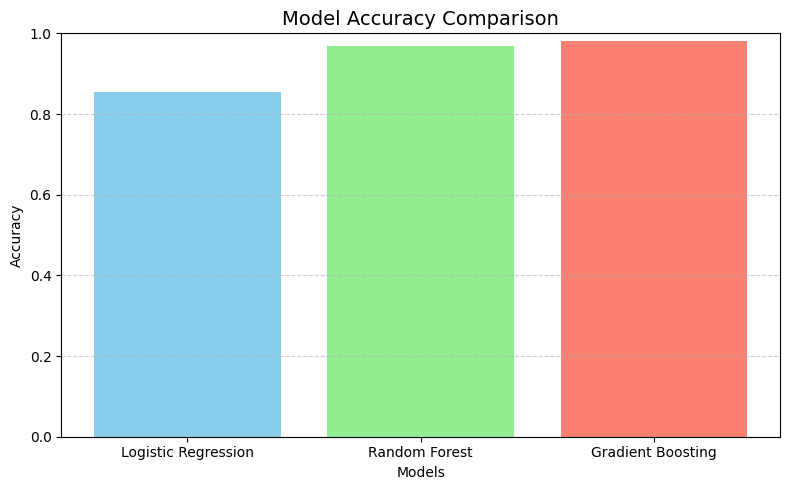

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['Accuracy'], color=['skyblue','lightgreen','salmon'])
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 7. Plotting ROC

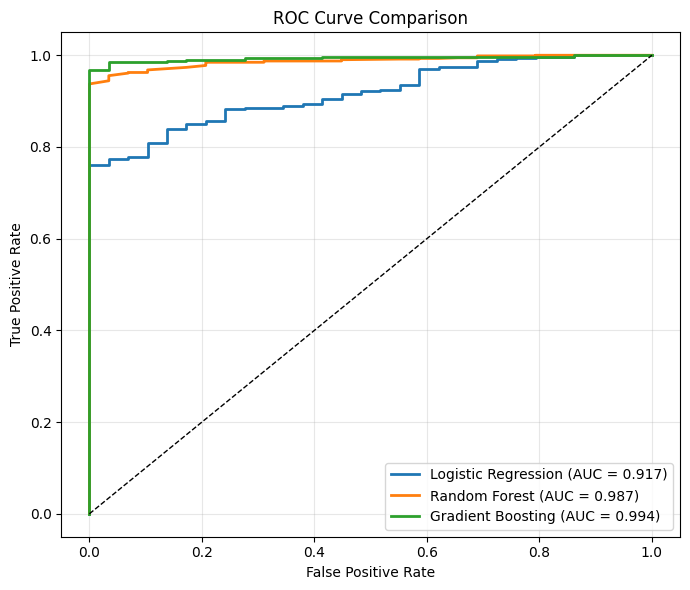

In [39]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(7,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0,1],[0,1],'k--',lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 8. Feature Analysis

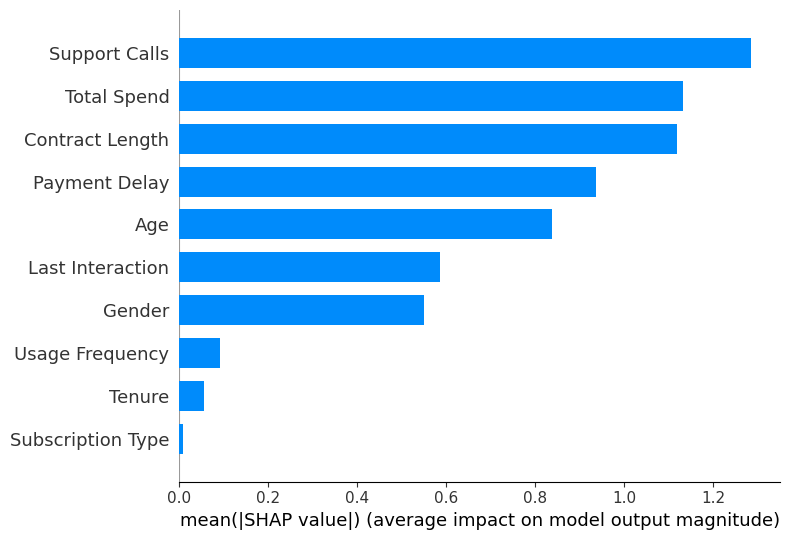

In [40]:
# Using Gradient Boosting for explainability
import shap
best_model = GradientBoostingClassifier(random_state=42)
best_model.fit(X_train, y_train)

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary Plot 
shap.summary_plot(shap_values, X_test, plot_type="bar")


## 9. Conclusion

Among all three models Gradient Boosting gave the best results with high Accuracy=0.981. Random Forest also worked well. Overall, these models predicted customer churn better than Logistic Regression.     

-----